# Import Libraries

In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate the data

In [8]:
# Initialize an empty list to store DataFrames
dfs = []

# Iterate through all files in the "data" folder
for file in os.listdir('data'):
    if file.endswith('.csv'):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join('data', file))
        
        # Add the "time" column
        if 'weekends' in file:
            df['time'] = 'weekends'
        elif 'weekdays' in file:
            df['time'] = 'weekdays'
        
        # Add the "city" column
        city = file[:-13] # Remove the last 13 characters from the file name
        df['city'] = city
        
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames together
final_df = pd.concat(dfs, ignore_index=True)

In [14]:
final_df.sample(5)

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,time,city
9147,232,769.427700,Entire home/apt,False,False,6.0,False,0,1,9.0,...,1.343484,0.554089,480.406475,18.549049,813.210806,17.863509,2.17979,41.39674,weekends,barcelona
48608,438,178.575602,Entire home/apt,False,False,4.0,True,0,1,9.0,...,2.131365,0.578752,132.279907,9.473321,189.705628,4.535050,16.36692,48.18989,weekdays,vienna
1239,136,1020.082956,Entire home/apt,False,False,4.0,True,0,0,9.0,...,1.388803,0.126948,482.456361,25.543855,518.987294,45.243234,4.89297,52.36075,weekends,amsterdam
2855,775,132.167881,Entire home/apt,False,False,2.0,False,0,0,10.0,...,1.460836,0.073388,217.708608,8.208519,278.049467,20.877646,23.72585,37.96479,weekdays,athens
46139,2504,104.037594,Private room,False,True,4.0,False,0,0,8.0,...,1.108907,0.127511,426.451827,9.448229,990.284672,21.575901,12.50720,41.89160,weekends,rome


In [10]:
final_df.shape

(51707, 22)

In [15]:
# put final_df into a csv file
final_df.to_csv('all_data.csv', index=False)

# Classic EDA

In [17]:
df = final_df.copy()

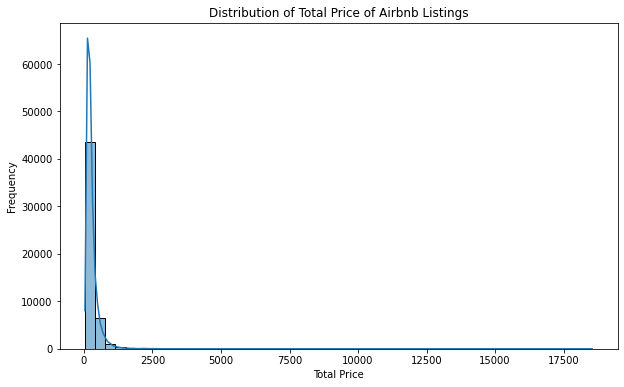

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['realSum'], bins=50, kde=True)
plt.title('Distribution of Total Price of Airbnb Listings')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.show()

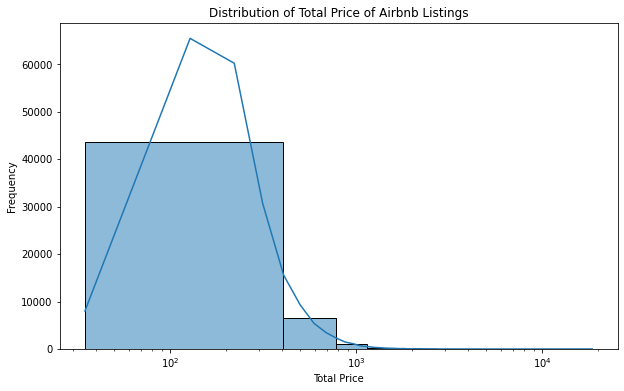

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['realSum'], bins=50, kde=True)
plt.title('Distribution of Total Price of Airbnb Listings')
plt.xlabel('Total Price')
plt.xscale('log')
plt.ylabel('Frequency')
plt.show()


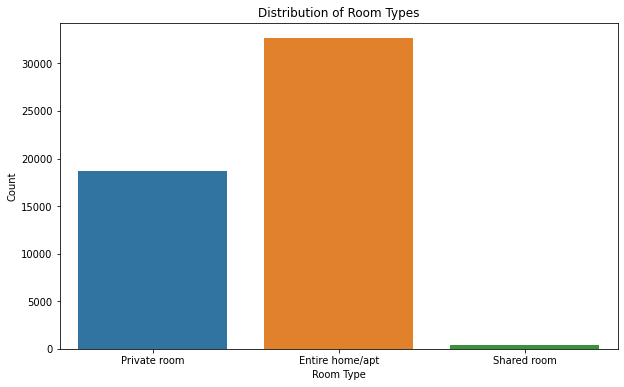

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


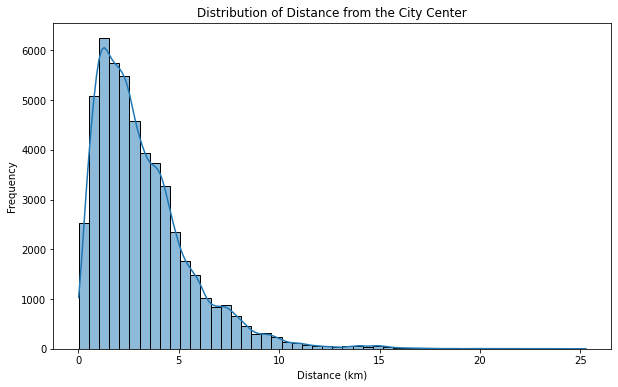

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['dist'], bins=50, kde=True)
plt.title('Distribution of Distance from the City Center')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_10648\4162662380.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='realSum', hue='time', data=df, ci=None)


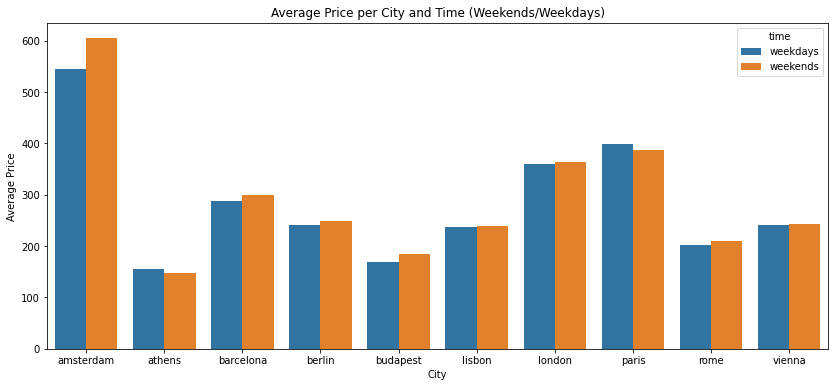

In [24]:
plt.figure(figsize=(14, 6))
sns.barplot(x='city', y='realSum', hue='time', data=df, ci=None)
plt.title('Average Price per City and Time (Weekends/Weekdays)')
plt.xlabel('City')
plt.ylabel('Average Price')
plt.show()

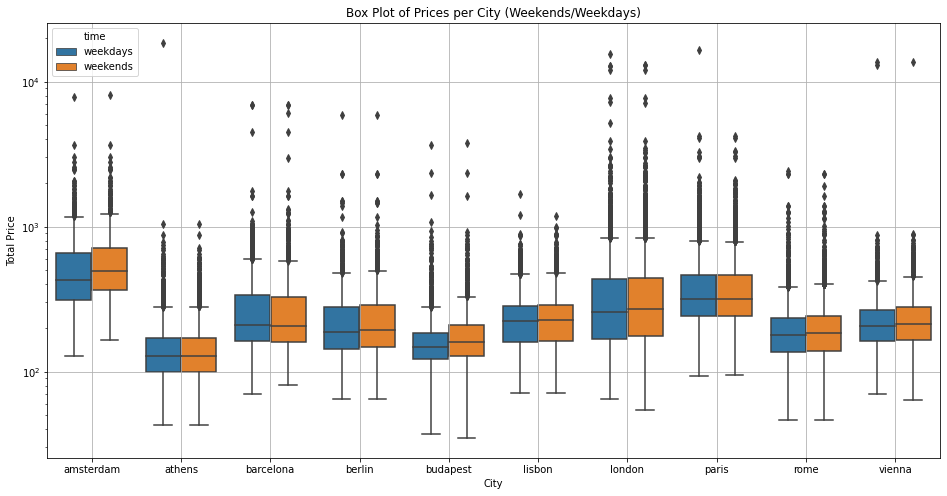

In [35]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='city', y='realSum', hue='time', data=df)
plt.title('Box Plot of Prices per City (Weekends/Weekdays)')
plt.xlabel('City')
plt.ylabel('Total Price')
plt.yscale('log')
plt.grid()
plt.show()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_10648\3459531814.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='cleanliness_rating', data=df, ci=None)


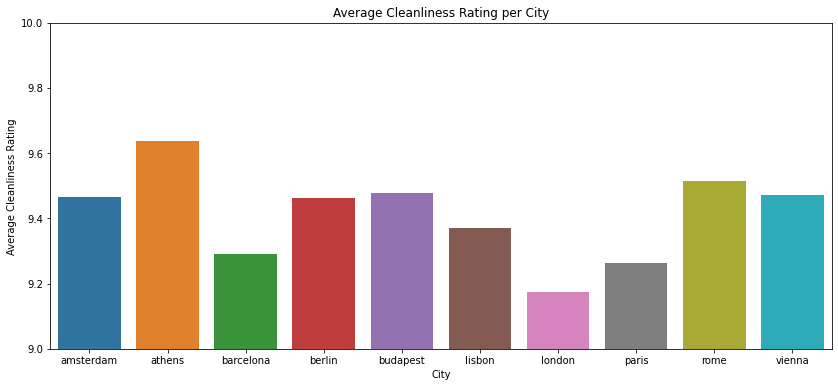

In [26]:
plt.figure(figsize=(14, 6))
sns.barplot(x='city', y='cleanliness_rating', data=df, ci=None)
plt.title('Average Cleanliness Rating per City')
plt.xlabel('City')
plt.ylabel('Average Cleanliness Rating')
plt.ylim(9, 10)
plt.show()

C:\Users\Kelyan\AppData\Local\Temp\ipykernel_10648\3525552612.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='city', y='guest_satisfaction_overall', data=df, ci=None)


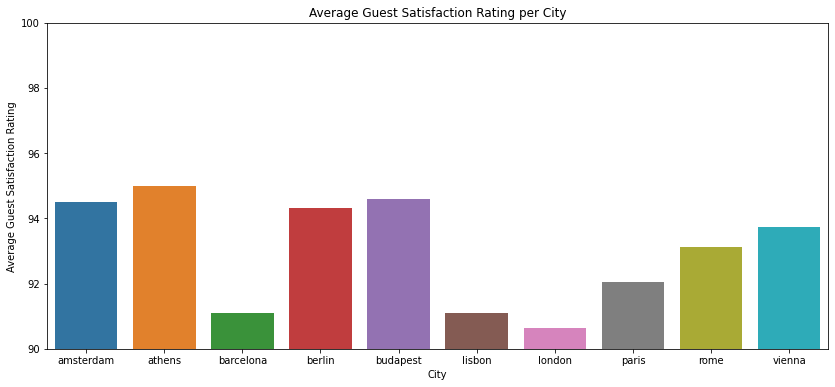

In [31]:
plt.figure(figsize=(14, 6))
sns.barplot(x='city', y='guest_satisfaction_overall', data=df, ci=None)
plt.title('Average Guest Satisfaction Rating per City')
plt.xlabel('City')
plt.ylabel('Average Guest Satisfaction Rating')
plt.ylim(90, 100)
plt.show()


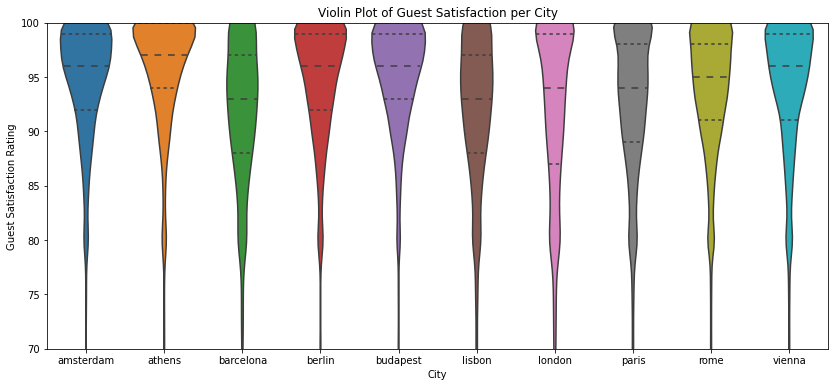

In [39]:
plt.figure(figsize=(14, 6))
sns.violinplot(x='city', y='guest_satisfaction_overall', data=df, inner='quartile')
plt.title('Violin Plot of Guest Satisfaction per City')
plt.xlabel('City')
plt.ylabel('Guest Satisfaction Rating')
plt.ylim(70, 100)
plt.show()

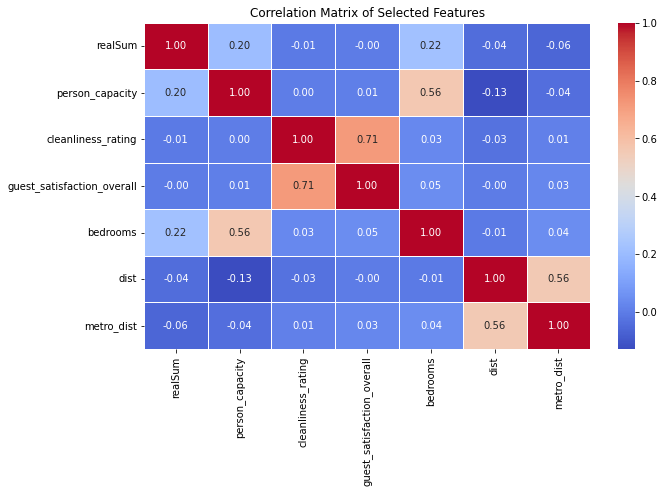

In [32]:
# Select columns for the correlation matrix
corr_columns = ['realSum', 'person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist']

# Compute the correlation matrix
corr = df[corr_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

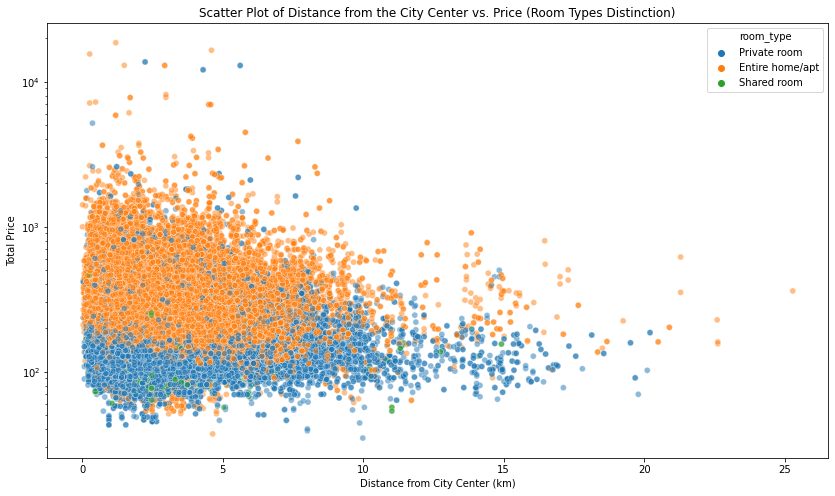

In [43]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='dist', y='realSum', hue='room_type', data=df, alpha=0.5)
plt.title('Scatter Plot of Distance from the City Center vs. Price (Room Types Distinction)')
plt.xlabel('Distance from City Center (km)')
plt.ylabel('Total Price')
plt.yscale('log')
plt.show()

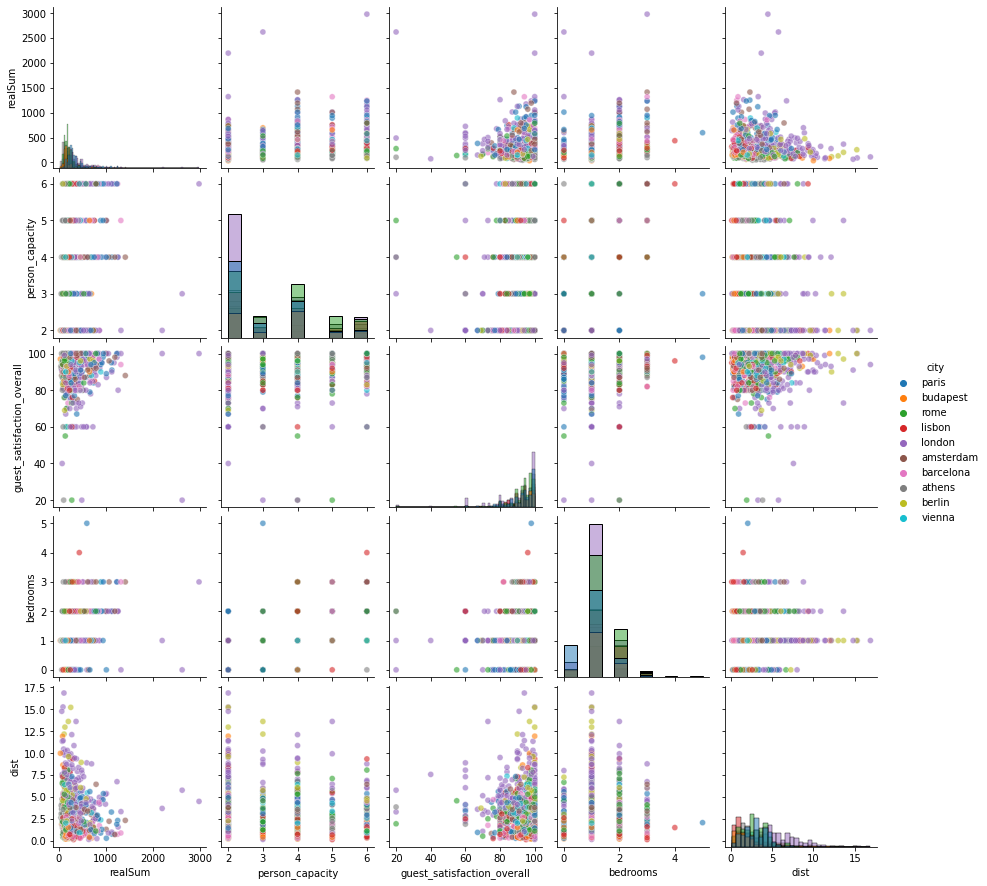

In [49]:
# Select columns for the pair plot
pair_columns = ['realSum', 'person_capacity', 'guest_satisfaction_overall', 'bedrooms', 'dist']
pair_df = df[pair_columns + ['city']].sample(1000)  # Sample 1000 rows to speed up plotting

# Create a pair plot
sns.pairplot(pair_df, hue='city', diag_kind='hist', plot_kws={'alpha': 0.6})
plt.show()

# More complex EDA

## Compare cities prices with same type of room

In [53]:
def filter_data(df, room_type, person_capacity, min_rating, max_rating, max_dist_from_center):
    filtered_data = df[(df['room_type'] == room_type) &
                       (df['person_capacity'] == person_capacity) &
                       (df['guest_satisfaction_overall'] >= min_rating) &
                       (df['guest_satisfaction_overall'] <= max_rating) &
                       (df['dist'] <= max_dist_from_center)]
    return filtered_data


In [59]:
filtered_df = filter_data(df,
                          room_type='Private room',
                          person_capacity=2,
                          min_rating=85,
                          max_rating=95,
                          max_dist_from_center=5)


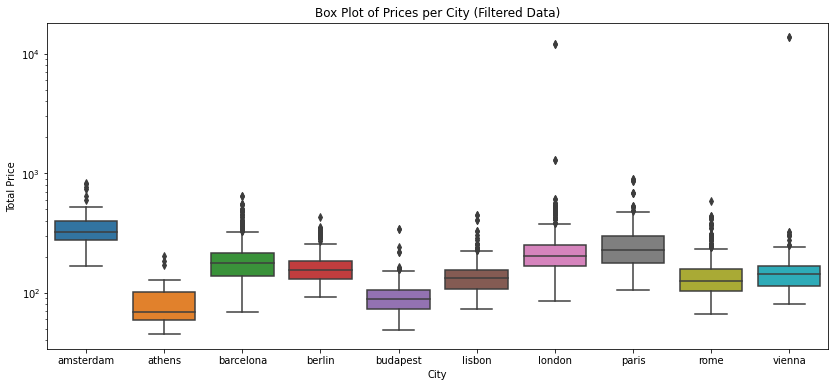

In [62]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='city', y='realSum', data=filtered_df)
plt.title('Box Plot of Prices per City (Filtered Data)')
plt.xlabel('City')
plt.ylabel('Total Price')
plt.yscale('log')
plt.show()

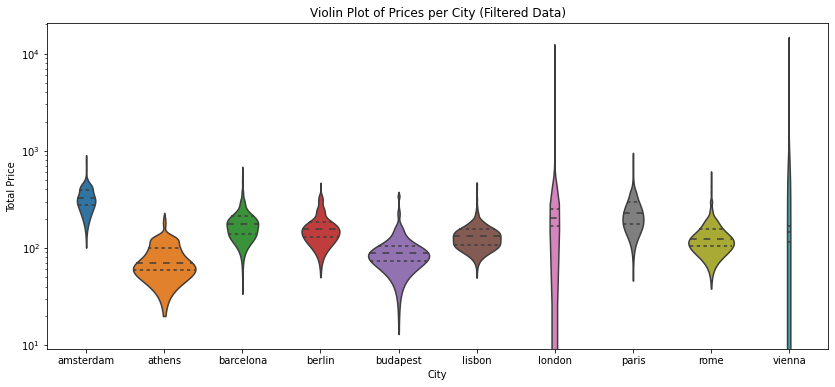

In [63]:
plt.figure(figsize=(14, 6))
sns.violinplot(x='city', y='realSum', data=filtered_df, inner='quartile')
plt.title('Violin Plot of Prices per City (Filtered Data)')
plt.xlabel('City')
plt.ylabel('Total Price')
plt.yscale('log')
plt.show()

C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 88.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kelyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:3540: UserWarning: 96.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Kelyan\AppData\Local\Package

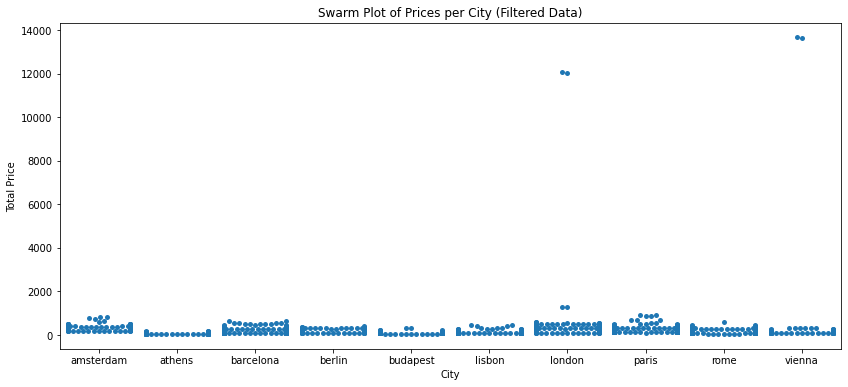

In [64]:
plt.figure(figsize=(14, 6))
sns.swarmplot(x='city', y='realSum', data=filtered_df, size=5)
plt.title('Swarm Plot of Prices per City (Filtered Data)')
plt.xlabel('City')
plt.ylabel('Total Price')
plt.show()